In [293]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import confusion_matrix

import data_preprocessing
%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [294]:
import imp
data_preprocessing = imp.reload(data_preprocessing)

In [69]:
output_path = "./Plots/"


In [70]:
data_original = pd.read_csv('./Data Mining VU data/training_set_VU_DM_2014.csv')

In [378]:
df = data_original.head(10000)


In [379]:
df_original = data_original.head(10000)

In [380]:
data = data_original.head(10000)

#  Feature Engineering

## Composite features
Rank by group
1. Extract season: autumn, summer, winter 


In [381]:
df['date_time']= pd.to_datetime(df['date_time'])
df = df.drop(['date_time'], axis=1)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Outliers
For features with high value outliers cap to maximum

In [382]:
all_cols = df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])


In [383]:
feature = 'price_usd'
df_before = df.copy()
for feature in all_cols:
    df[feature][df[feature]>df[feature].quantile(0.99)] = df[feature].quantile(0.99)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### NEW FEATURES

In [384]:
df['price_diff_from_historic_mean']= df.price_usd - df.visitor_hist_adr_usd

In [385]:
df['price_usd'].quantile(0.99)

602.770307

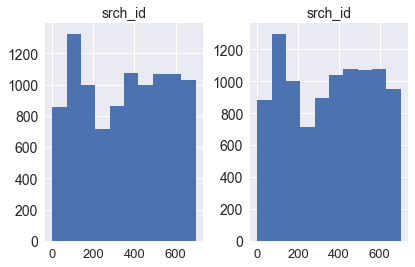

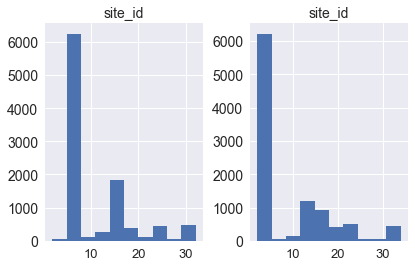

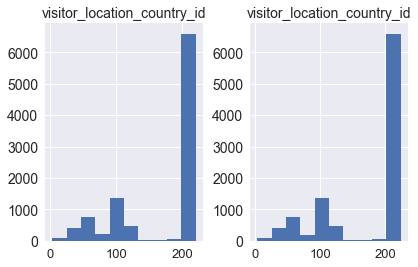

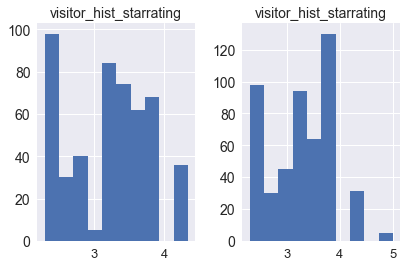

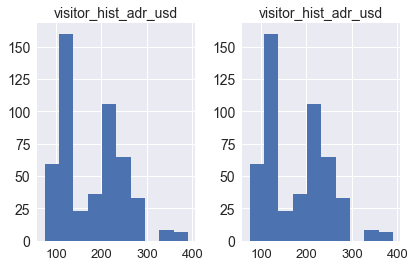

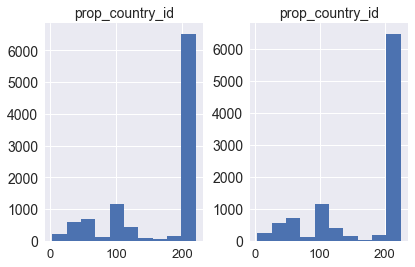

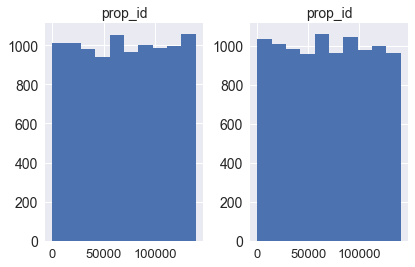

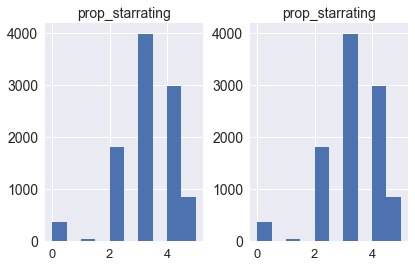

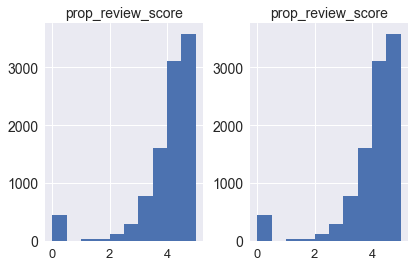

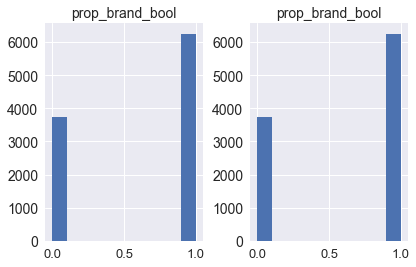

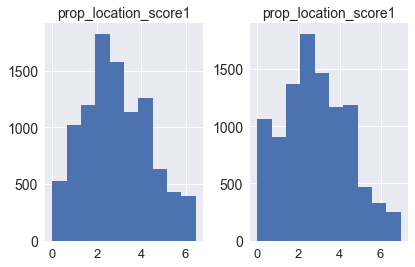

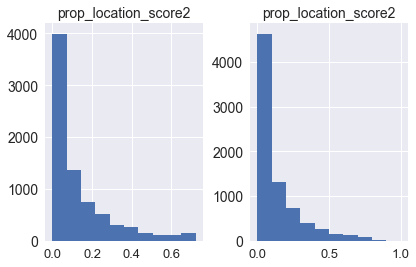

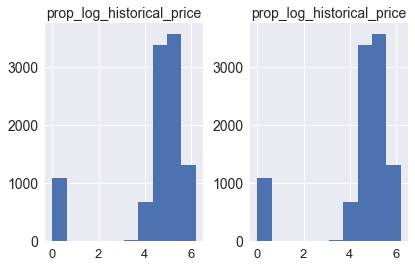

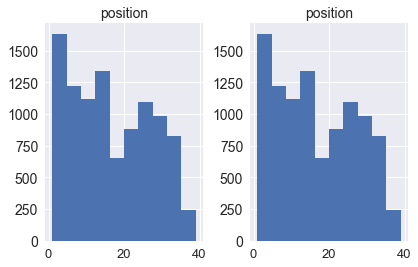

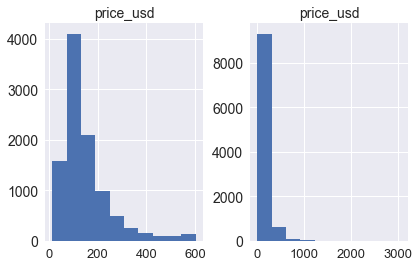

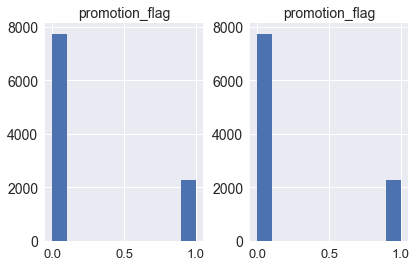

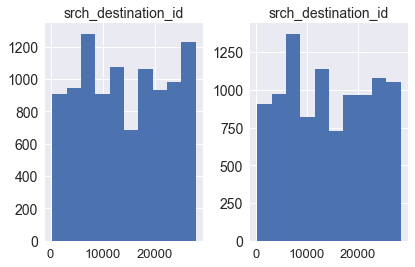

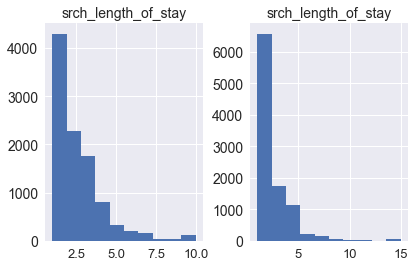

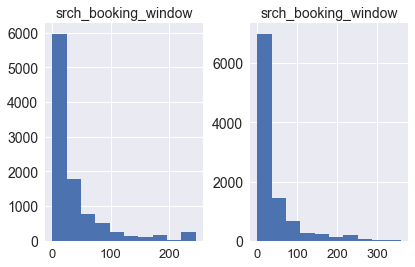

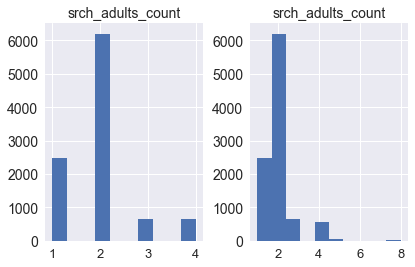

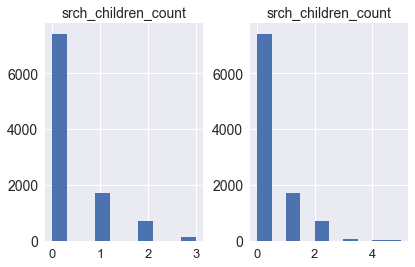

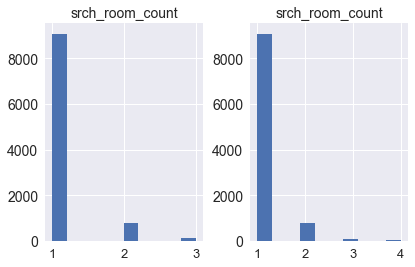

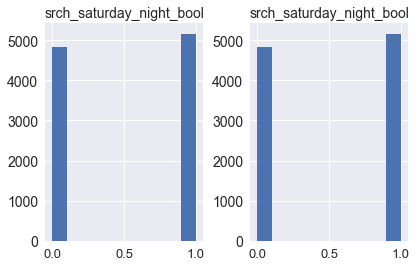

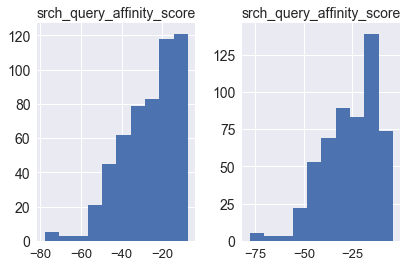

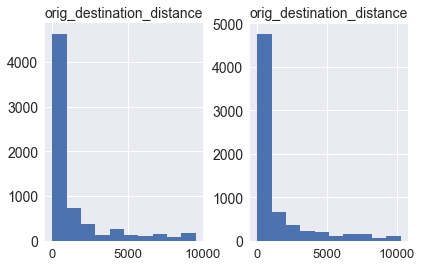

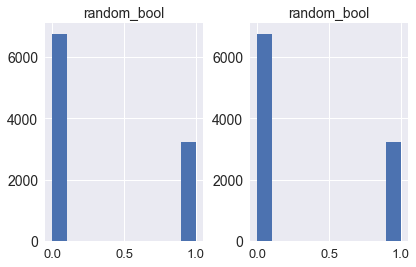

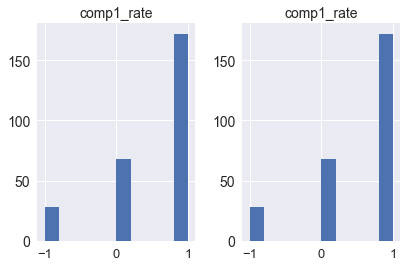

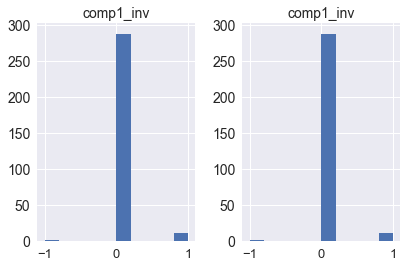

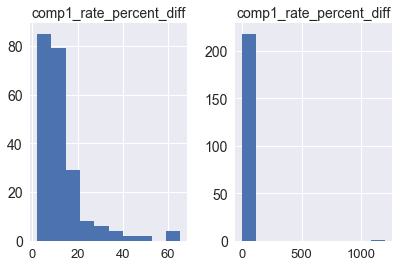

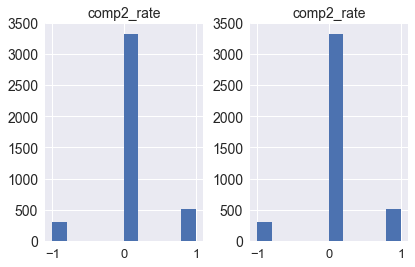

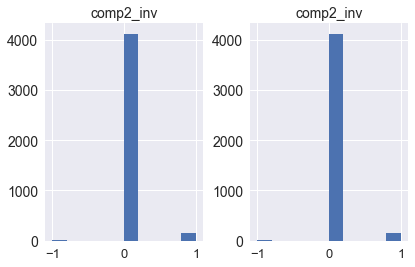

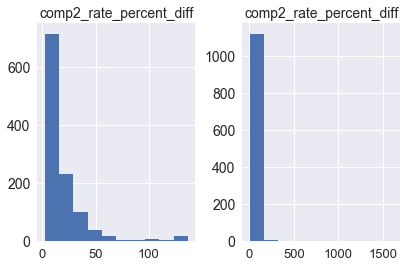

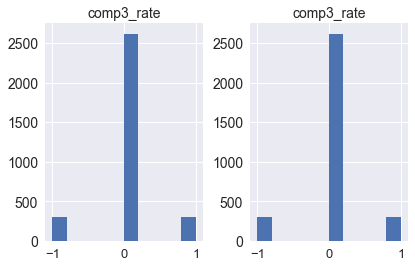

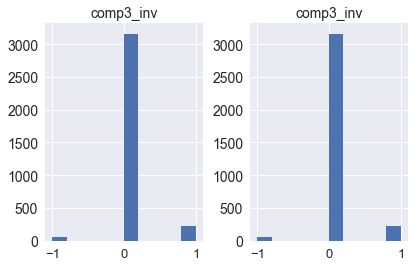

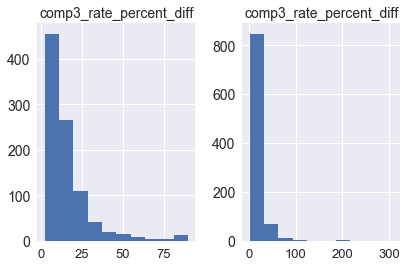

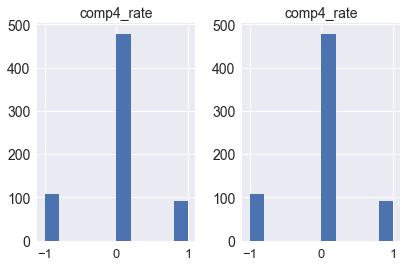

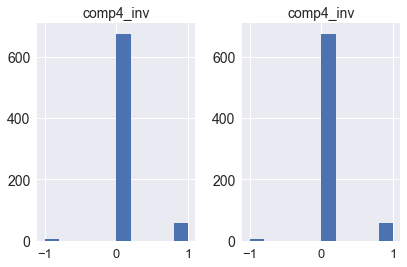

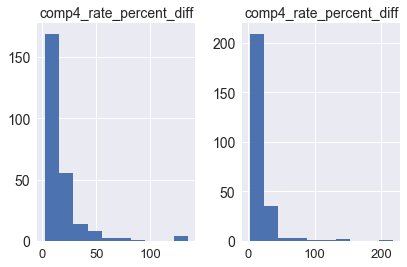

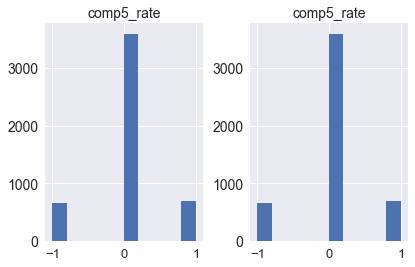

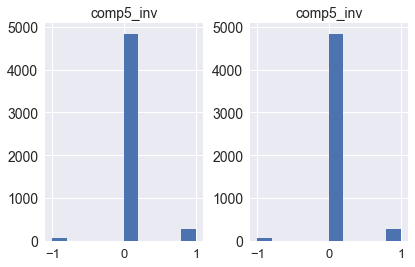

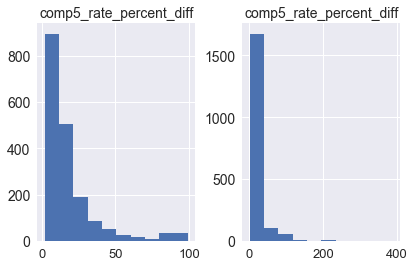

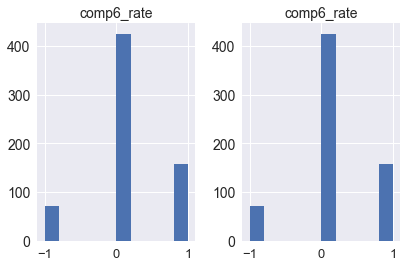

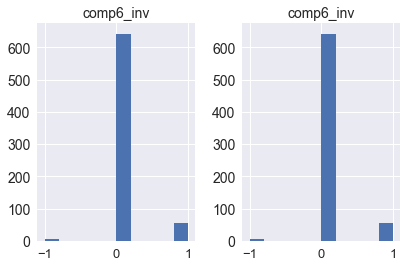

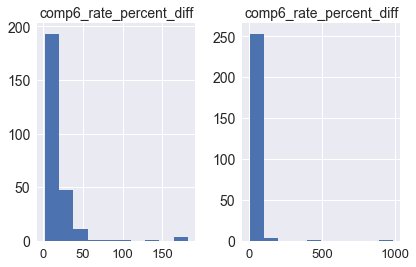

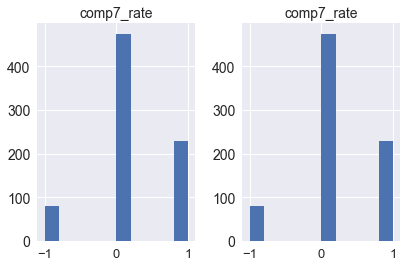

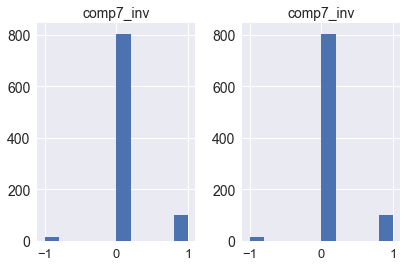

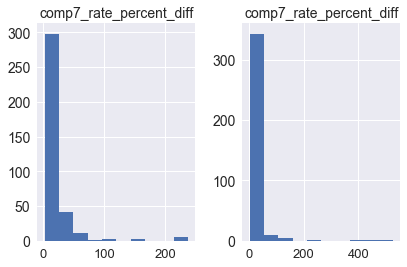

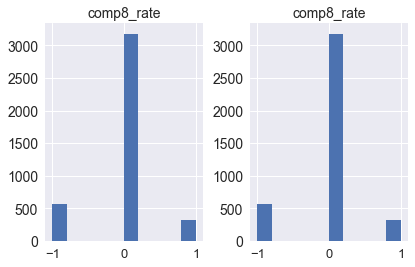

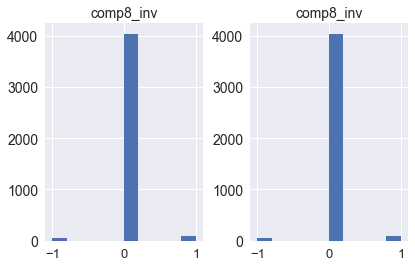

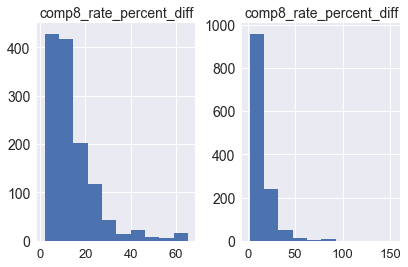

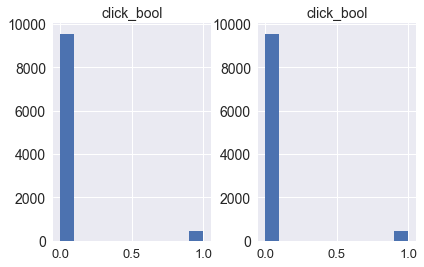

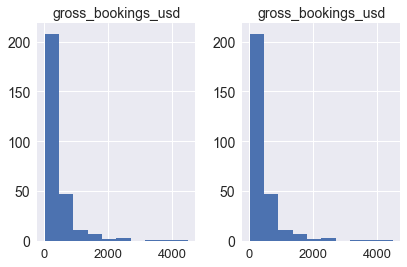

KeyError: "['price_diff_from_historic_mean'] not in index"

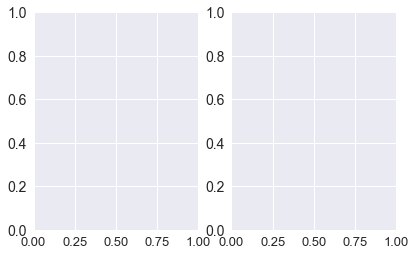

In [386]:
for feature in all_cols:
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)  
    df_before[[feature]].hist(bins=10, ax=ax2)
    df[[feature]].hist(bins=10, ax=ax1)
    plt.savefig(output_path + "hist_remove_outliers_%s.png"%feature, format='png')

    plt.show()



In [387]:
df = data_preprocessing.create_composite_features(df)
# Remove outliers before normalizing?
df = data_preprocessing.normalize_within_group(df)
    

In [ ]:
TO_DROP = ["visitor_hist_adr_usd"]

### Set Missing values to median

In [388]:
all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])

for feature in all_cols:
    df[feature][df[feature].isnull()] = df[feature].median()


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [389]:
# Subselect columns - include booking_book
summary_metrics = pd.DataFrame(df.describe())

In [390]:
df=df[list(summary_metrics.columns)]

In [391]:
summary_metrics

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,price_diff_from_historic_mean,price_rank,star_rank,value_for_money,price_usd_normalized,value_for_money_normalized
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,281.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,353.820500,9.943100,172.913600,3.259731,180.549116,171.313800,69980.065500,3.169400,3.782700,0.625200,...,11.373538,0.045700,409.795516,0.028100,-36.605528,12.177000,12.177000,0.033281,0.361397,0.468940
std,204.390114,7.514007,67.111343,0.127120,14.213314,69.676669,40572.454449,1.063681,1.034523,0.484095,...,4.006179,0.208844,551.617038,0.165267,19.657147,7.770644,7.770644,0.019192,0.280039,0.275583
min,1.000000,2.000000,4.000000,2.300000,74.790000,4.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,26.460000,0.000000,-331.570000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,162.000000,5.000000,100.000000,3.260000,180.750000,100.000000,34802.000000,3.000000,3.500000,0.000000,...,11.000000,0.000000,125.210000,0.000000,-36.510000,6.000000,6.000000,0.020725,0.136584,0.259449
50%,365.000000,5.000000,219.000000,3.260000,180.750000,219.000000,69701.500000,3.000000,4.000000,1.000000,...,11.000000,0.000000,209.500000,0.000000,-36.510000,11.000000,11.000000,0.031646,0.294448,0.464747
75%,533.000000,14.000000,219.000000,3.260000,180.750000,219.000000,104517.000000,4.000000,4.500000,1.000000,...,11.000000,0.000000,490.360000,0.000000,-36.510000,18.000000,18.000000,0.043489,0.529888,0.670823
max,698.000000,32.000000,220.000000,4.337600,390.570000,220.000000,139249.310000,5.000000,5.000000,1.000000,...,65.260000,1.000000,4491.280000,1.000000,398.870700,61.000000,61.000000,0.284900,1.000000,1.000000


### Calculate correlation and mutual information/information gain

### Histograms

In [393]:
#columns_to_plot=[50,12,39,42,47,48,51,53]
#g = sns.pairplot( df.iloc[1:500,columns_to_plot], hue="booking_bool",palette = 'seismic',size=5,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10),  )


## HISTOGRAMS OF VARIABLES OF INTEREST

# for feature in data.columns:
#     try:
#         data[[feature]].hist(bins=10)
#         plt.title(feature)
#         plt.savefig(output_path + "hist_%s_original.png"%feature, format='png')
#         plt.show()

#     except:
#         pass

# for feature in df.columns:
#     try:
#         data[[feature]].hist(bins=10)
#         plt.title(feature)
#         plt.savefig(output_path + "hist_%s_new.png"%feature, format='png')
#         plt.show()

#     except:
#         pass




## Distribution of each feature for booked and not booked hotels
Helps find the most discriminative features

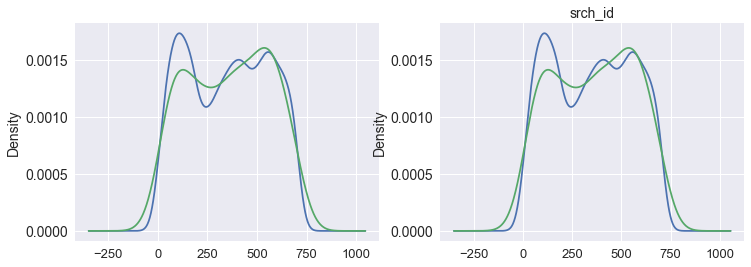

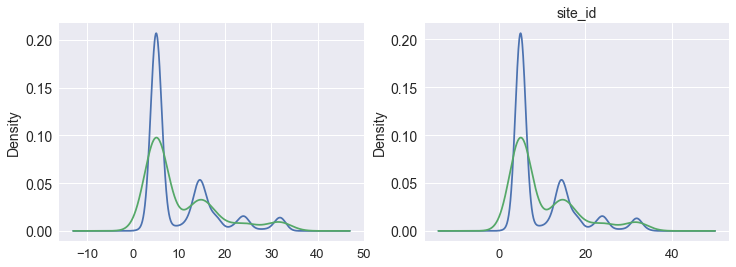

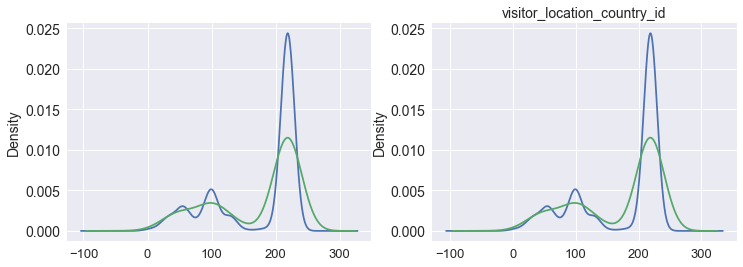

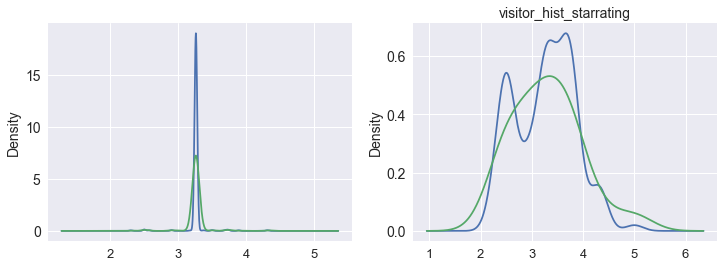

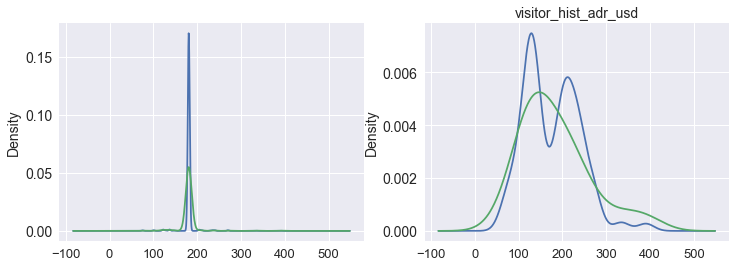

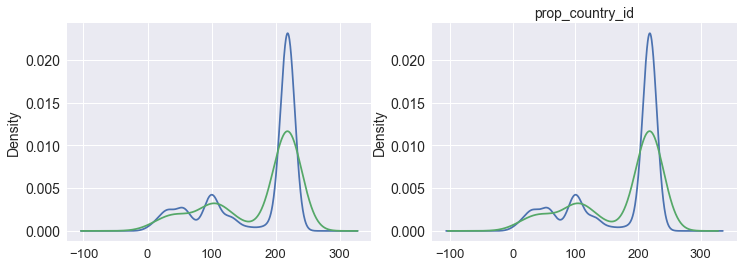

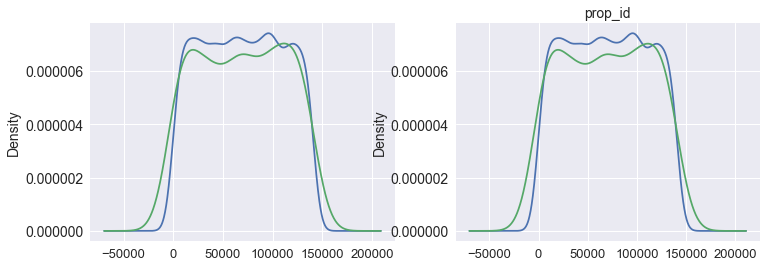

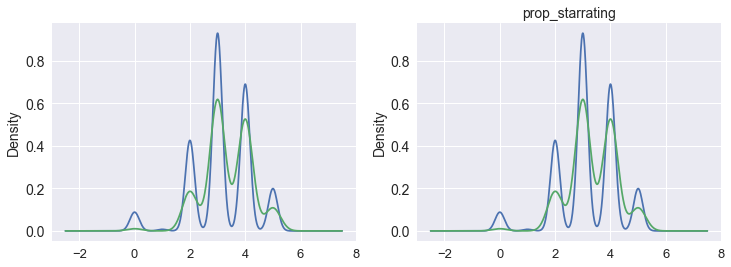

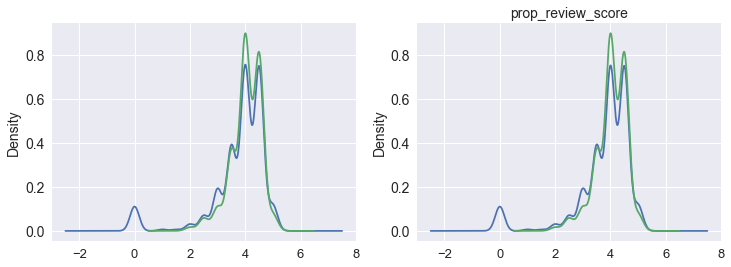

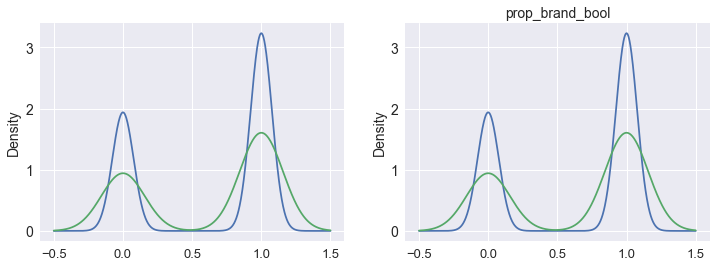

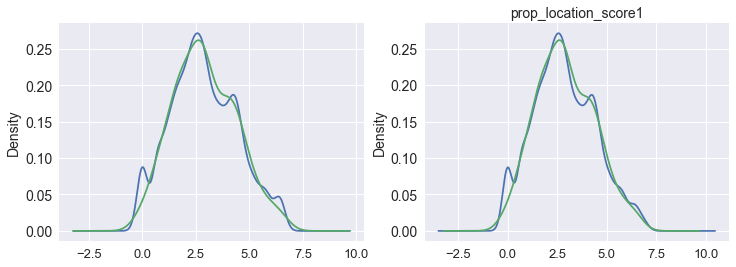

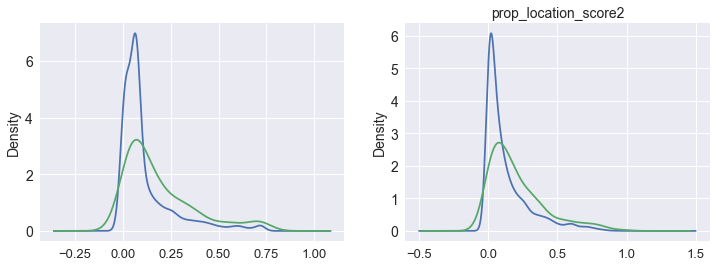

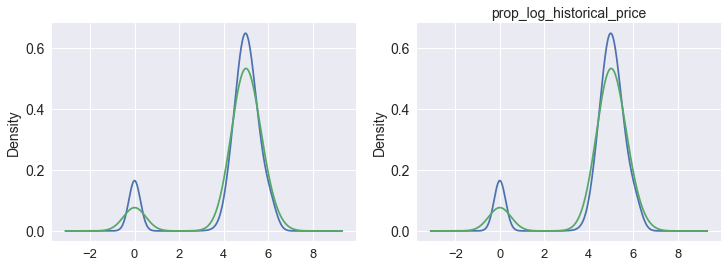

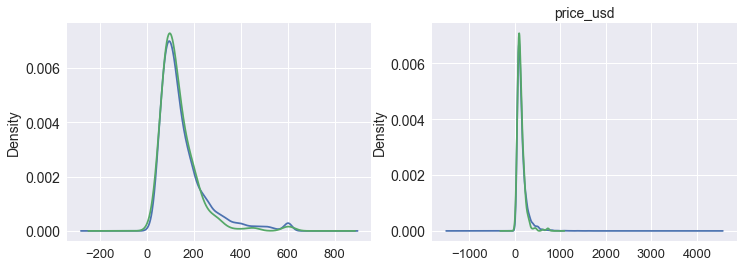

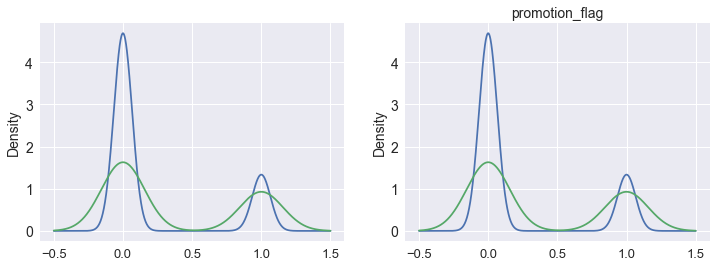

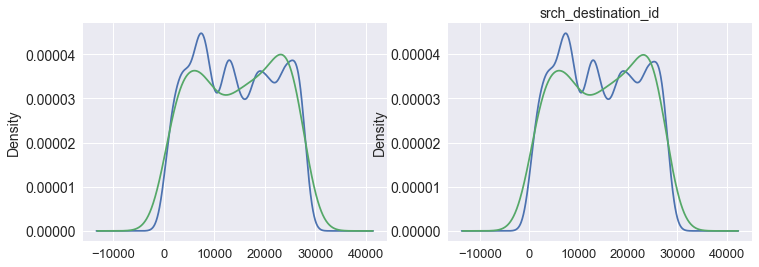

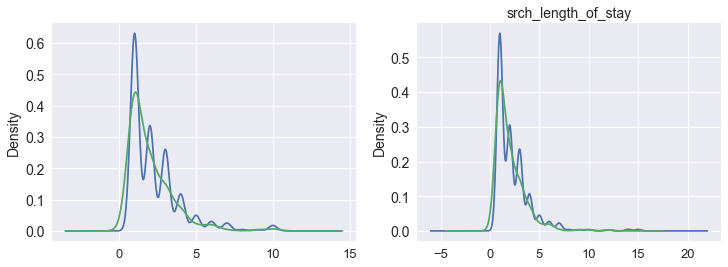

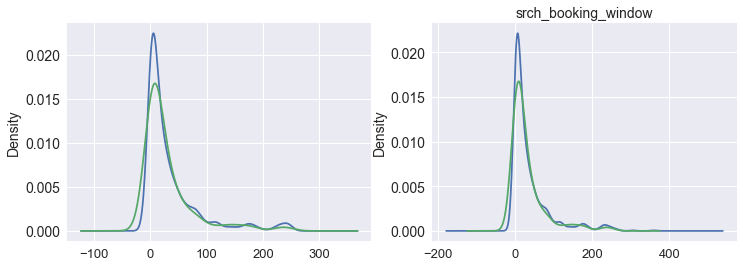

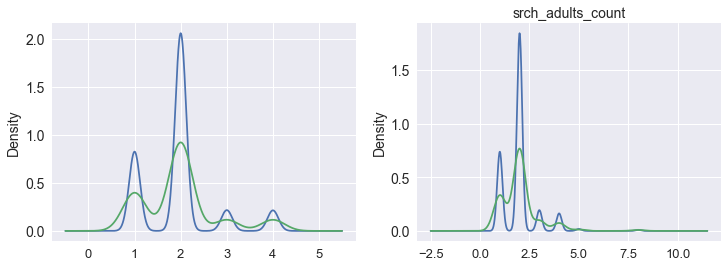

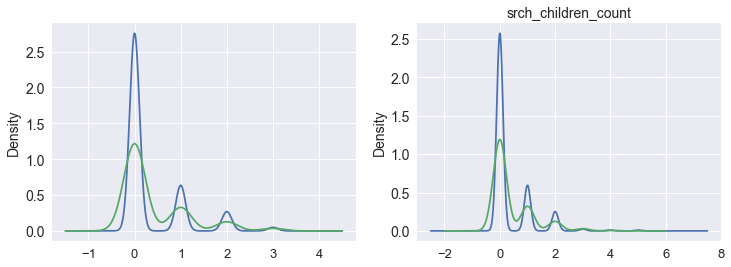

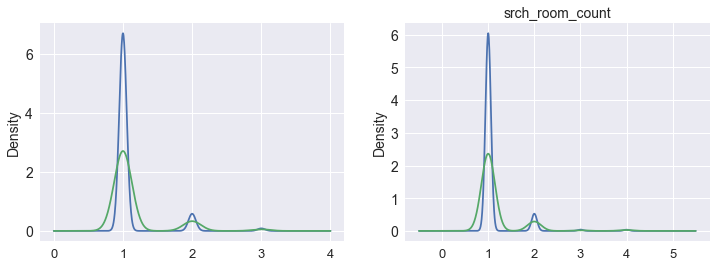

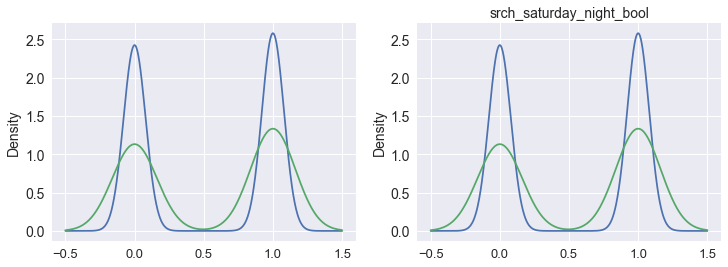

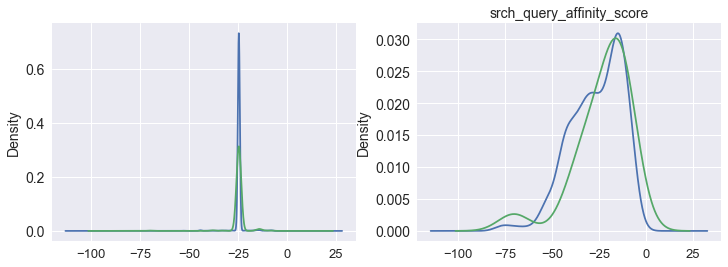

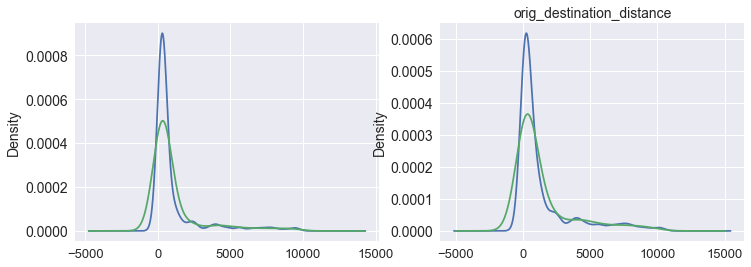

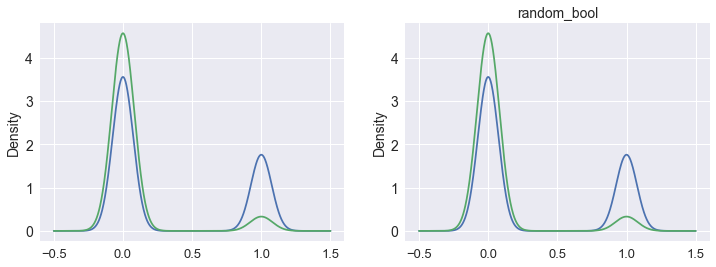

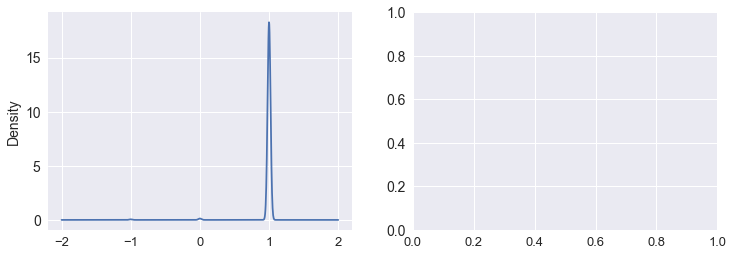

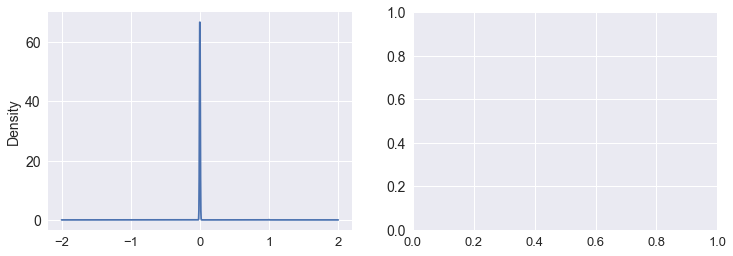

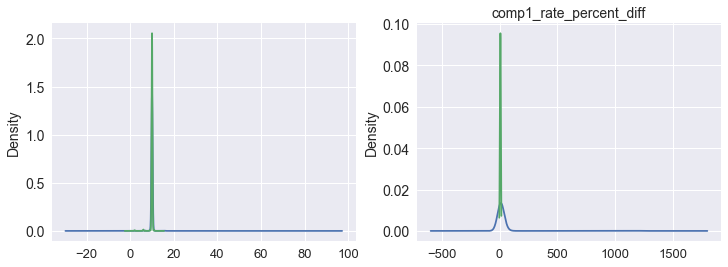

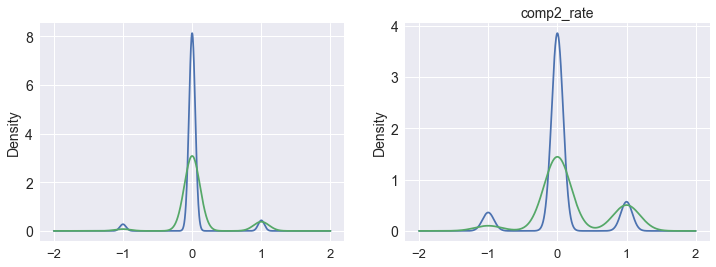

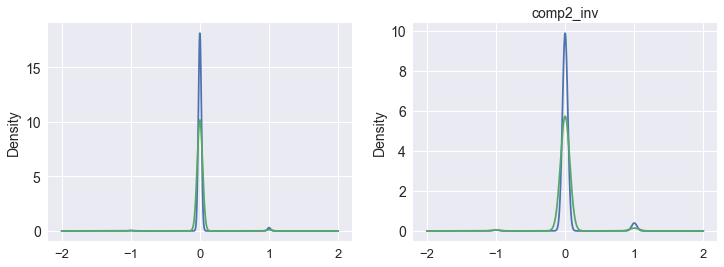

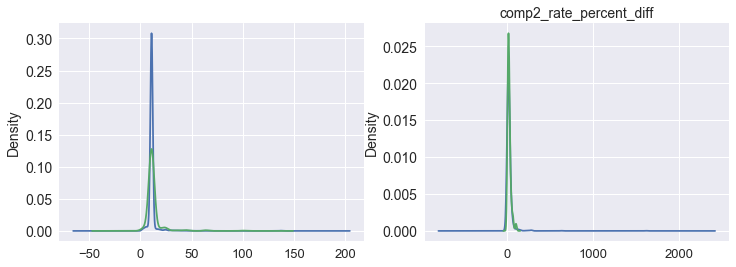

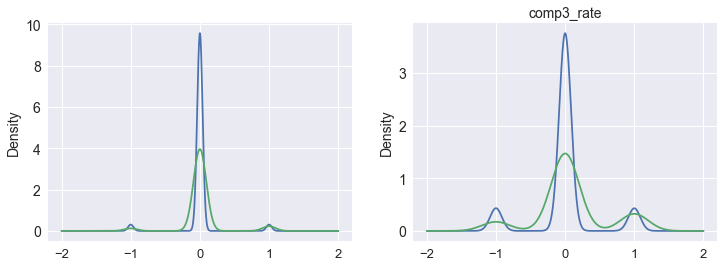

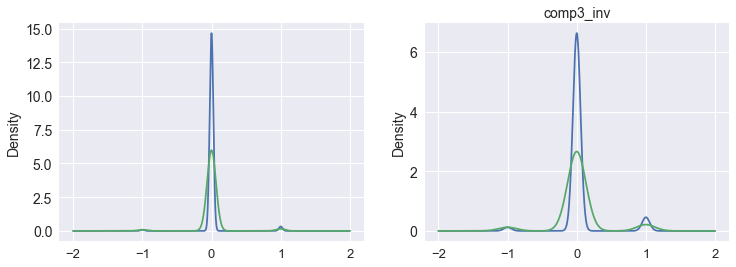

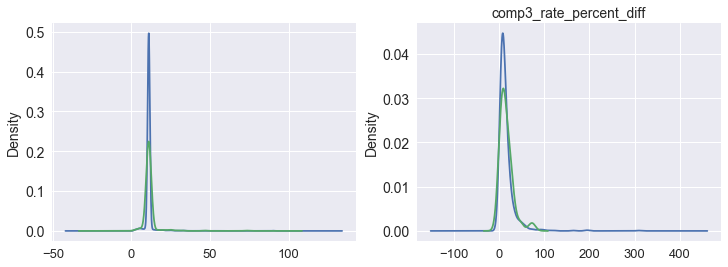

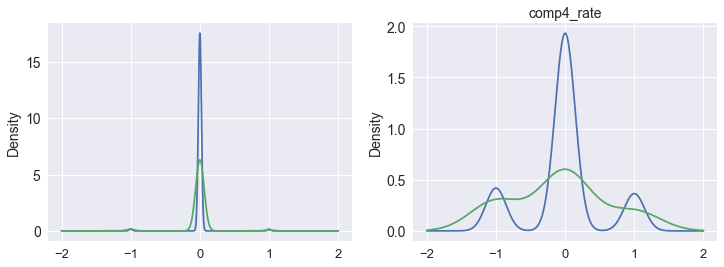

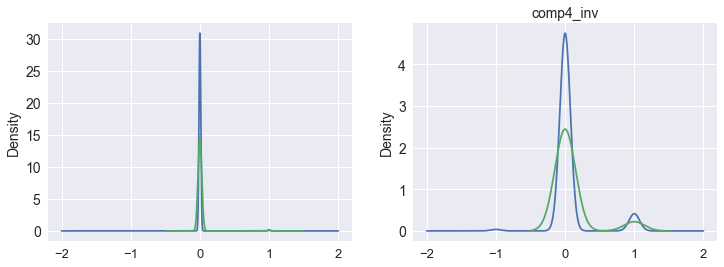

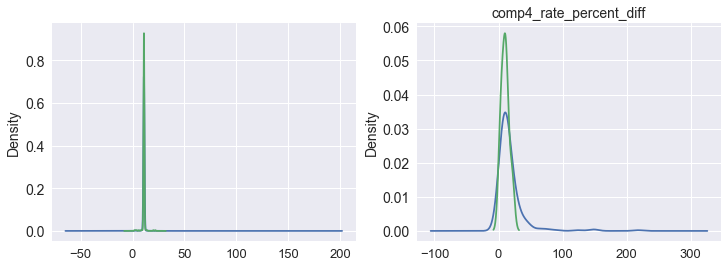

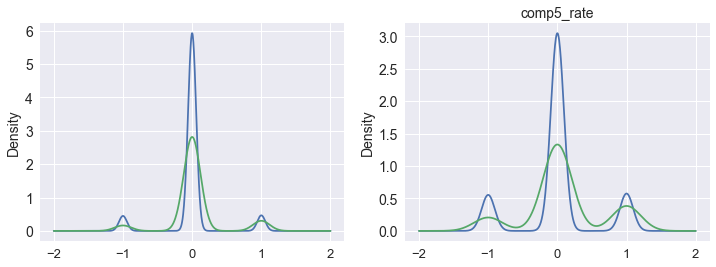

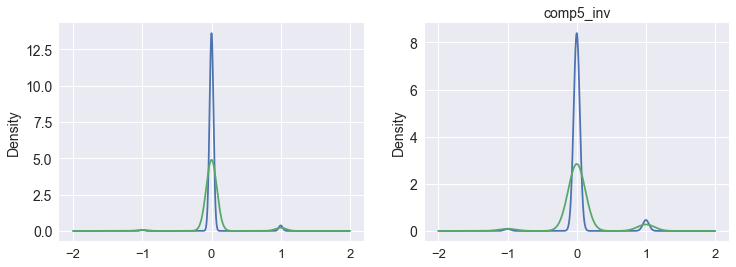

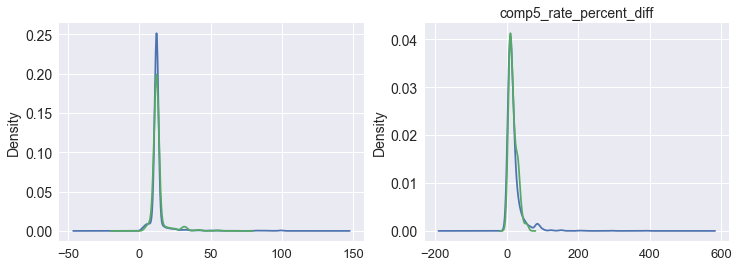

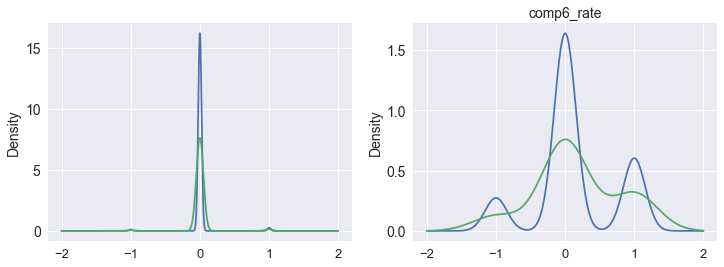

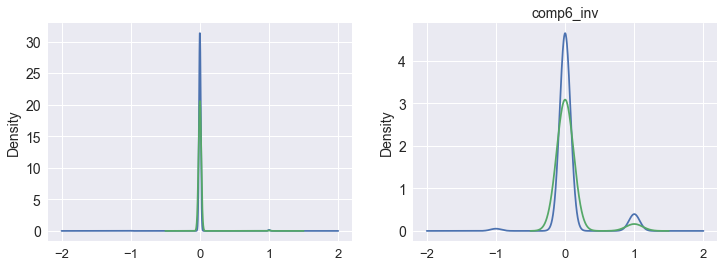

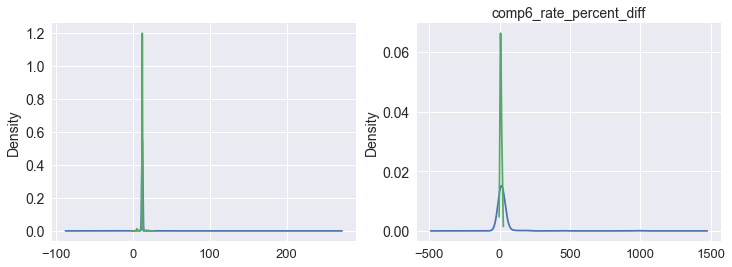

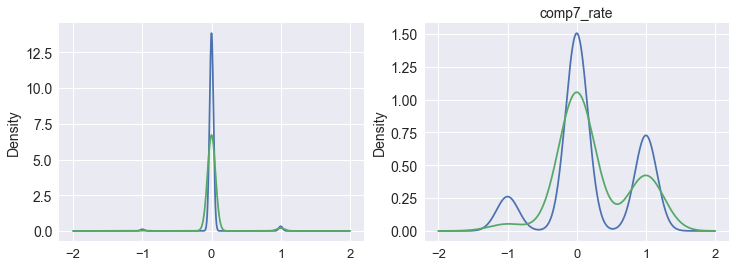

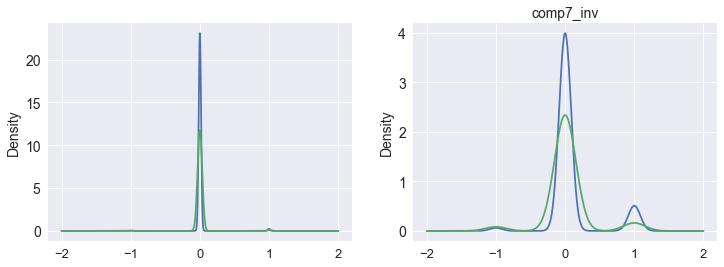

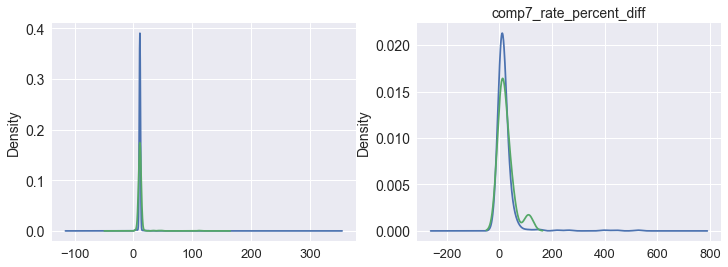

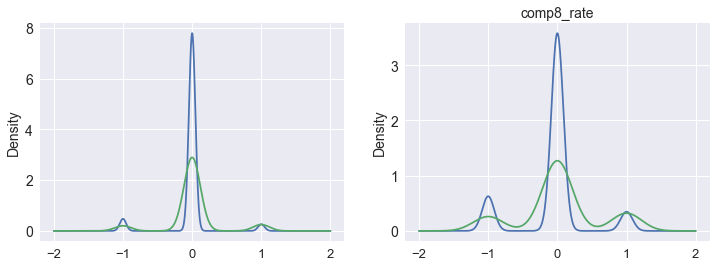

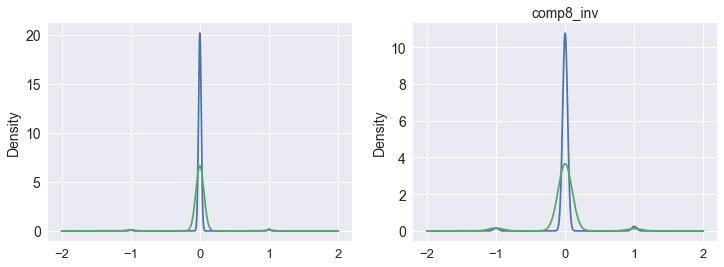

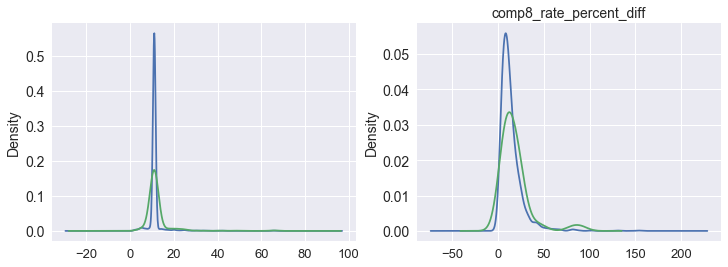

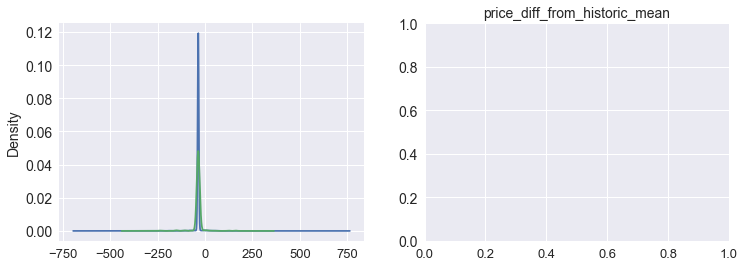

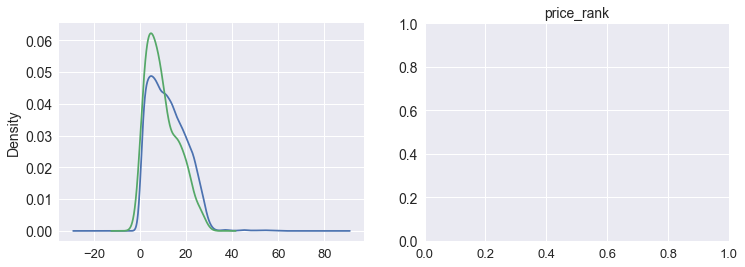

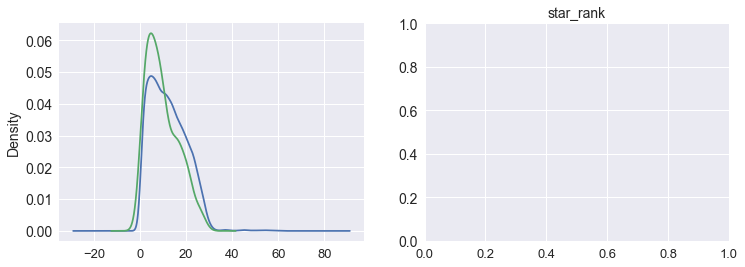

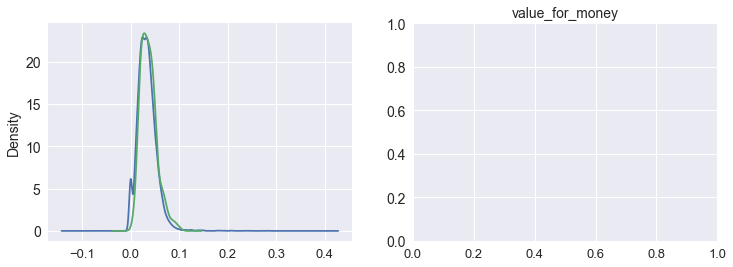

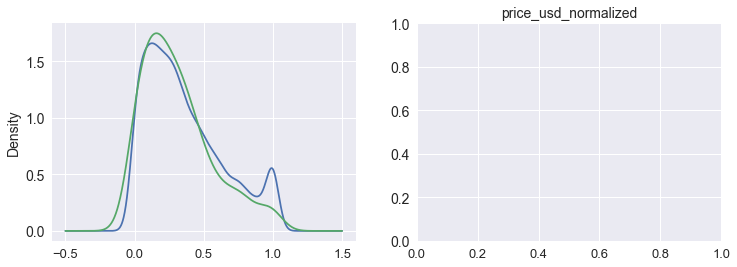

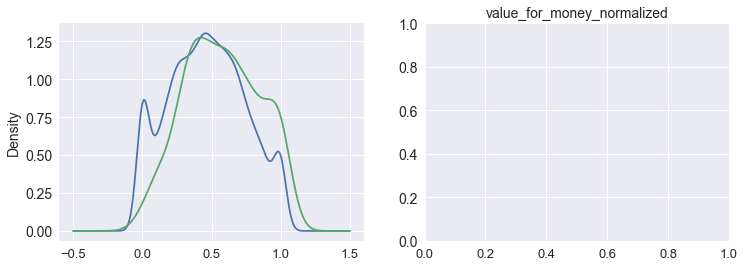

In [417]:
all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])

for feature in all_cols:
    try:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
        df.groupby("booking_bool")[feature].plot(kind='kde', ax=ax1)
        plt.title(feature)

        data.groupby("booking_bool")[feature].plot(kind='kde', ax=ax2)
        plt.savefig(output_path + "densityplot_before_after_%s.png"%feature, format='png')
        plt.show()
    except:
        pass


### Comments and Findings

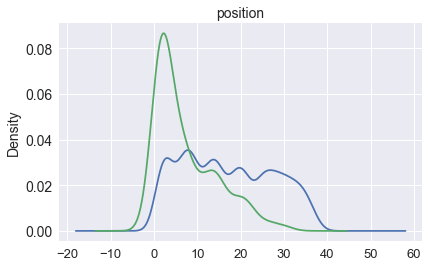

In [396]:
discriminative_features = ['position']

feature = discriminative_features[0]
df.groupby("booking_bool")[feature].plot(kind='kde')
plt.title(feature)
plt.show()

In [397]:
 all_cols

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'co

## Mutual information with booking 
Gives the most important features based on univariate statistics

In [398]:
all_cols = df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])


In [399]:
from sklearn.feature_selection import mutual_info_classif

mutual_information_click = mutual_info_classif(df[all_cols], df[['click_bool']], discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
click_df = pd.DataFrame(mutual_information_click.flatten(), columns = ['mutual_info'])
click_df['feature'] = df[all_cols].columns.values

mutual_information_book = mutual_info_classif(df[all_cols], df[['booking_bool']], discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
book_df = pd.DataFrame(mutual_information_book.flatten(), columns = ['mutual_info'])
book_df['feature'] = df[all_cols].columns.values



/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """


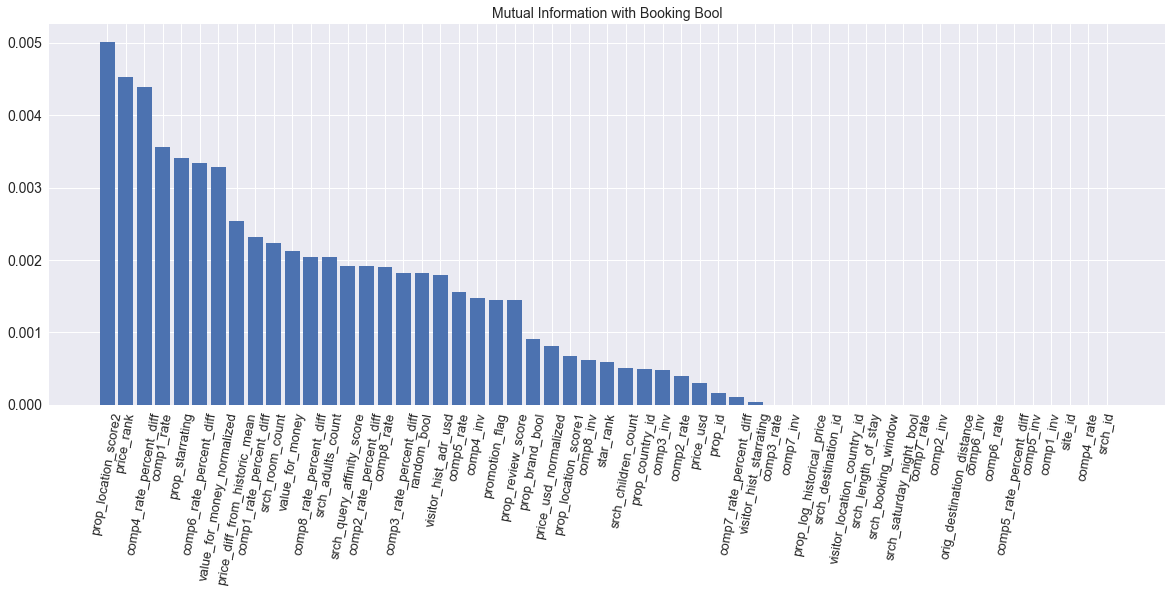

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


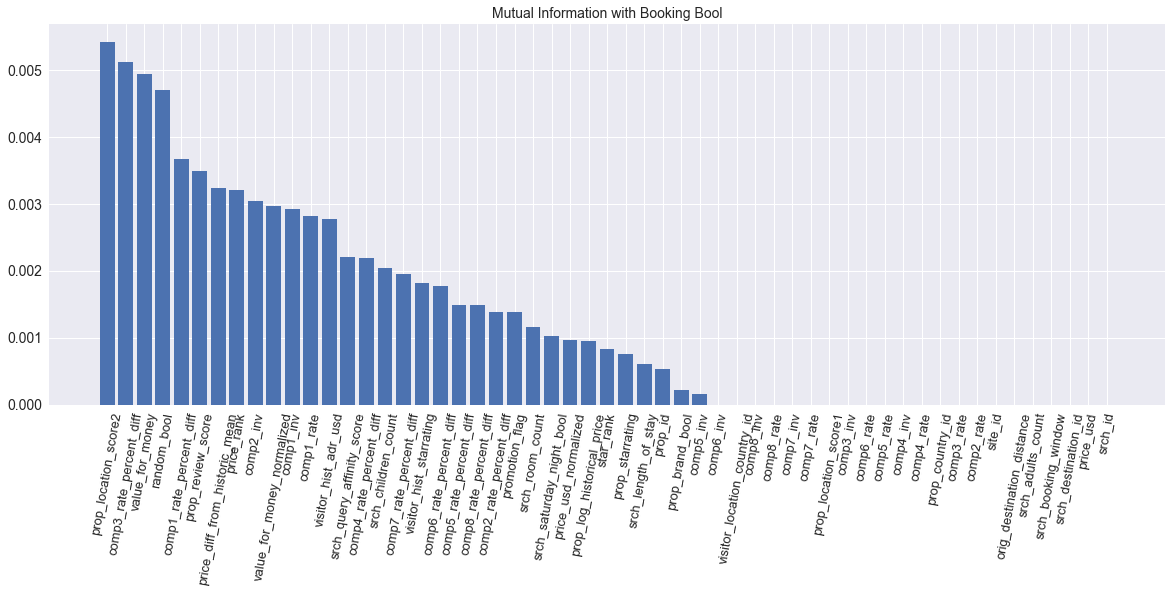

In [400]:
ind = np.arange(len(mutual_information_book))
fig, ax = plt.subplots(figsize=(20,7)) 

plt.bar(ind, click_df.sort('mutual_info', ascending=False)['mutual_info'])
plt.xticks(ind,click_df.sort('mutual_info', ascending=False)['feature'], rotation=80)
plt.title('Mutual Information with Booking Bool')
plt.savefig(output_path + "MutualInformation_click_bool.png", format='png')
plt.show()



ind = np.arange(len(mutual_information_click))
fig, ax = plt.subplots(figsize=(20,7)) 

plt.bar(ind, book_df.sort('mutual_info', ascending=False)['mutual_info'])
plt.xticks(ind,book_df.sort('mutual_info', ascending=False)['feature'], rotation=80)
plt.title('Mutual Information with Booking Bool')
plt.savefig(output_path + "MutualInformation_book_bool.png", format='png')
plt.show()

In [404]:
features_to_keep = ['booking_bool', 'click_bool', 'srch_id']
selected_features = ['value_for_money','value_for_money_normalized','price_usd', 'price_usd_normalized','price_rank','price_diff_from_historic_mean', 'star_rank', 'prop_review_score', 'position',
                     'prop_brand_bool', 'prop_location_score1']

all_possible_features = selected_features+features_to_keep

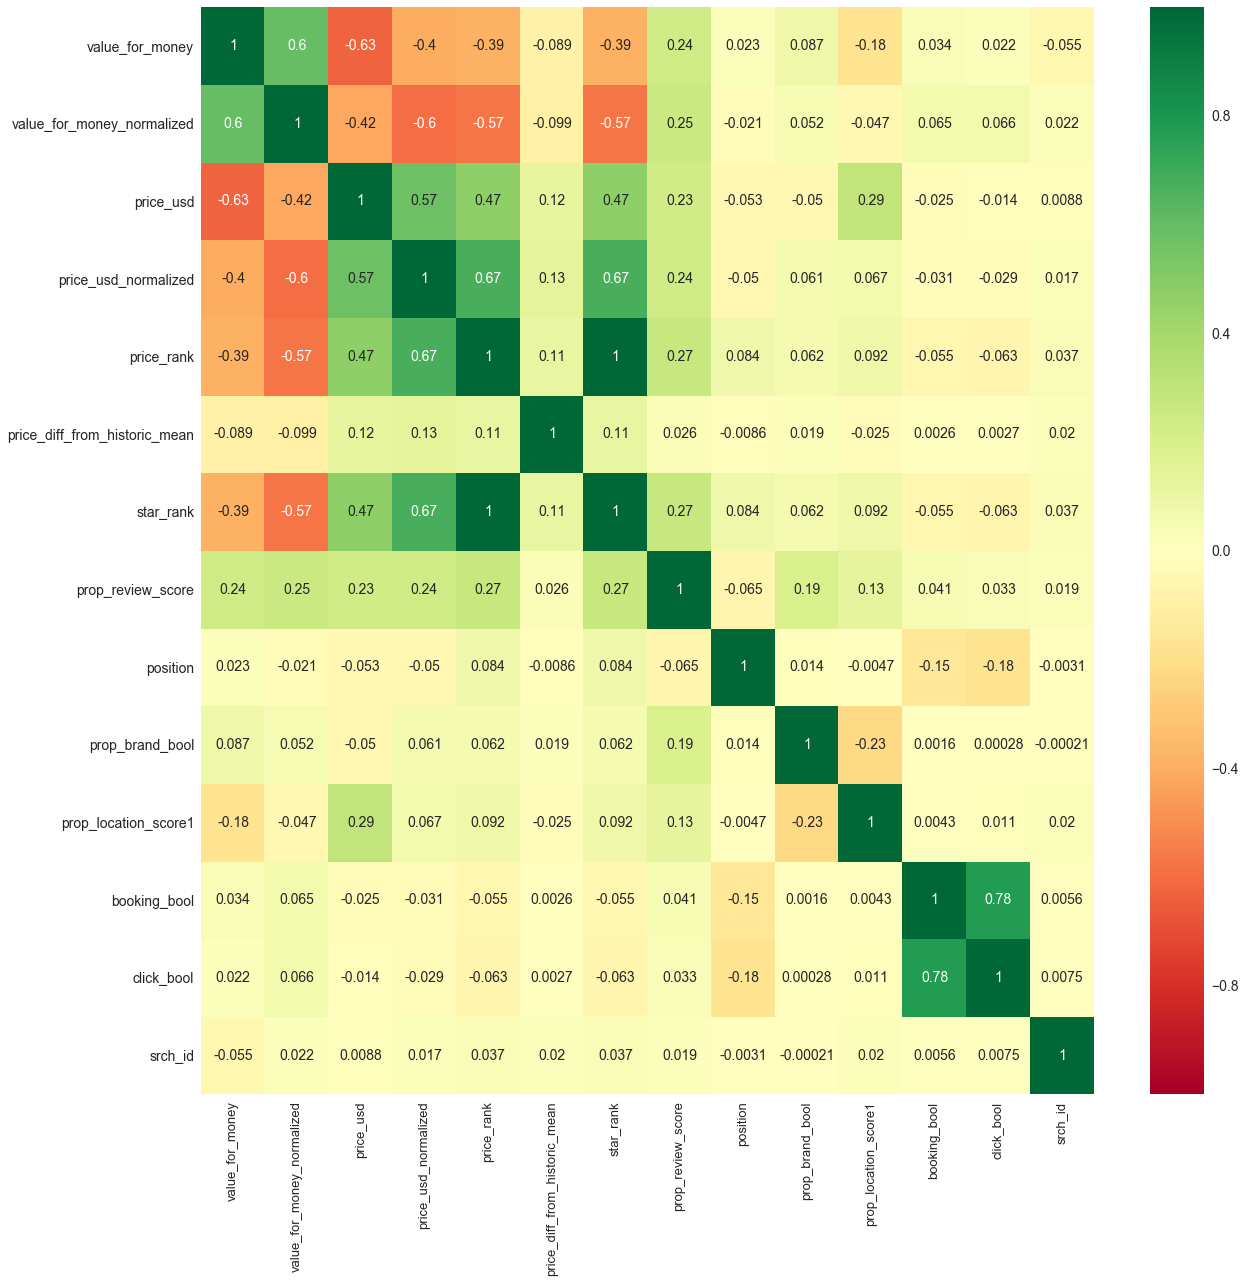

In [405]:
def plot_corr(data):
    correlation = data.corr()
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    plt.savefig(output_path + "correlation_plot.png", format='png')

plot_corr(df[all_possible_features])





In [406]:
selected_features = ['value_for_money','price_usd_normalized', 'star_rank']
features_to_keep = ['booking_bool', 'click_bool', 'srch_id']
all_possible_features = selected_features+features_to_keep
df_to_train = df.ix[:,all_possible_features]

df_to_train['relevance']=df_to_train.booking_bool+df_to_train.click_bool

for feature in all_possible_features:
    df_to_train[feature][df_to_train[feature].isnull()] = df_to_train[feature].median()




/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [407]:
relevance_arr = np.array(df_to_train.relevance)
feature_arr = np.array(df_to_train[selected_features])
id_arr = np.array(df_to_train.srch_id)

In [409]:
import pyltr
metric = pyltr.metrics.NDCG(k=10)

model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=1000,
    learning_rate=0.02,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=10,
    min_samples_leaf=64,
    verbose=1,
)

model.fit(feature_arr, relevance_arr, id_arr)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.1589       0.0854        5.10m                                         
    2       0.2204       0.0517        4.74m                                         
    3       0.2345      -0.0116        4.65m                                         
    4       0.2520       0.0217        4.67m                                         
    5       0.2518       0.0208        4.65m                                         
    6       0.2933       0.0008        4.63m                                         
    7       0.2976      -0.0051        4.66m                                         
    8       0.3172      -0.0012        4.62m                                         
    9       0.2750      -0.0035        4.63m                                         
   10       0.3219      -0.0036        4.63m                                         
   15       0.3296      -0.0074        4.61m         

## Missing values

# Build Model and classifier

In [ ]:
## Finalise the dataset
final_df=df_to_train

# Choose setting 
mode = 'Full' # 'Full' or 'partial'
model_to_plot=0 # 0 or 1
mode = 'partial'

# For SVM use Age continuous as it can learn nonlinear relationships
#selected_features =["Pclass", "Sex", "Age*Class", "Fare_Per_Person", "hasCabin", 
#                    "Title","Survived",
#                   "Family_Size", "Embarked", "Age"]

select = ['booking_bool']
auc = []

models_names = [ 'LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier' ]
metric = 'roc_auc'
cv=4
models = [ LogisticRegression,  RandomForestClassifier , SVC]


In [ ]:

model_to_plot = 1
class_predict = "booking_bool"
all_possible_features = selected_features       
for feature in all_possible_features:
    select.append(feature)
    print(select)
    full_set = final_df[select]

    # First split the data into train and test

    # Extract the train and test from the new data_frame
    cols = list(set(full_set.columns) - set([class_predict]))
    X_train = full_set[:][cols]
    y_train = full_set[:][class_predict]
    
        # Running some models, testing with small cross_validation and f1 metric (binary target) and running the prediction
    # with all the training set
    
    mscores = []
    lscores = ['f1','accuracy','recall','roc_auc']
    np.random.seed(42) # Reproducibility of results is very important!
    for elem in models:
        mscores2 = []
        model = elem()
        for sc in lscores:
            scores = cross_val_score(model, X_train, y_train, scoring=sc, cv=cv)
            #y_pred = cross_val_predict(model, X_train, y_train, scoring=sc, cv=cv)
            #conf_mat = confusion_matrix(y_train,y_pred)
            
            mscores2.append(np.mean(scores))
            mscores.append(mscores2)
       # model_predict(model, X_train, y_train, mode)       
    scores = pd.DataFrame(mscores, columns=lscores)
    print(scores.ix[model_to_plot,metric])
    auc.append(scores.ix[model_to_plot,metric])

plt.plot(auc)
plt.ylabel(metric)
plt.title(models_names[model_to_plot])
plt.xticks(np.arange(len(all_possible_features)), all_possible_features,  rotation=45)
plt.savefig(output_path + "auc_by_feature_%s_%s_cv%s.png"%(models_names[model_to_plot], mode, cv), format='png')
plt.tight_layout()  
plt.show()
    